In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Cette ligne retourne quatre tableaux Numpy : 
- **X_train :** Les images d'entraînements pour entrainer le modèle. Chaque image est représentée comme une matrice de 28x28 pixels en niveaux de gris. 
- **y_train :** Les labels d'entraînements = valeurs réelles (0 à 9) correspondant aux images d'entraînement. 
- **X_test :** Les images de test, utilisées pour évaluer la performance du modèle après l'entraînement. Chaque image est une matrice de 28x28. 
- **y_test :**: Les labels des tests. 

In [ ]:
len(X_train) # Renvoit le nombre d'images d'entraînement (60 000)

60000

In [ ]:
len(X_test) # Renvoit le nombre d'images de test (10 000)

10000

In [ ]:
X_train[0].shape # Renvoit 28x28 (taille de la matrice de cette image)

(28, 28)

In [ ]:
X_train[0] # Renvoit la matrice de la première image de X_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

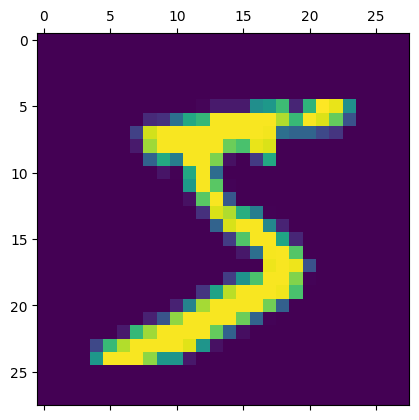

In [ ]:
plt.matshow(X_train[0]) # Affiche l'image (en niveaux de gris)

In [ ]:
y_train[0] # Affiche le label de l'image 5

np.uint8(5)

In [ ]:
X_train.shape # Affiche (60000, 28, 28)

(60000, 28, 28)

Ce morceau de code décrit la dimension des données d'entraînement dans le dataset MINST.
- Il y a 60 000 images dans le jeu de données d'entraînement. 
- Chaque image a une hauteur de 28 px
- Chaque image a une largeur de 28 px

In [27]:
# Code ajouté après avoir initié le modèle et l'avoir entraîné une première 
X_train = X_train / 255
X_test = X_test / 255

**Le code précédent est de la normalisation**

Les images du dataset MNIST sont en niveau de gris, et chaque pixel prend une valeur entre 0 et 255. En divisant chaque pixel par 255, les valeurs sont réduites à un intervalle de 0 à 1. Cela permet : 
- Une meilleure convergence lors de l'entraînement
- Réduction de disparités dans les features 
- Stabilité numérique

En divisant par 255, on aide le modèle à mieux apprendre en ajustant les données d'entrée à une échelle plus maniable et en favorisant un entraînement plus stable et efficace. 

In [30]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

Utilise une méthode de numpy utilisée pour donner une nouvelle forme à un tableau sans changer ses données. 
Ce code change la forme de chaque image de 28x28 (une matrice) en un vecteur de 784 pixels (28 multiplié par 28). 
X_train_flattened aura une forme de (60000, 784)

**L'opération de flattening transforme une liste en deux dimensions (matrice) en une liste en une dimension (vecteur)**. 

Chaque image dans le dataset MNIST est initialement représentée comme une matrice 2D de 28x28. Chaque entrée dans cette matrice représente l'intensité d'un pixel en niveau de gris. En applatissant cette matrice, on la convertit en un vecteur de 784 éléments (28 x 28). Cette transformation est essentielle pour utiliser les images avec des modèles qui ne gèrent pas les données sous forme de matrice 2D. 

In [ ]:
X_train_flattened.shape # Outputs (60000, 784)

(60000, 784)

In [31]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

/home/pierre/Documents/EPITECH/Digit-Classification-MNIST/bootstrap-ia/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - accuracy: 0.8178 - loss: 0.7078
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9123 - loss: 0.3161
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9196 - loss: 0.2903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9219 - loss: 0.2769
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9263 - loss: 0.2638


La normalisation a permis d'avoir une meilleure accuracy !
L'output précédent permet d'évaluer l'accuracy du modèle sur le dataset d'entraînement. Il faut maintenant l'utiliser sur le dataset de test. 